In [1]:
# 5.4_decision_reversal_critical_factors_analysis.ipynb
""" 5.4 Decision Reversal and Critical Factors Analysis """
import numpy as np
import numpy_financial as npf
from EngFinancialPy import IntFactor
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
# Common data
marr = 0.12
Life = 10

In [3]:
# Alternative A
I_A = 170000
R_A = 35000
E_A = 3000 
SV_A = 20000

# Alternative B
I_B = 120000
R_B = 40000
EBy1 = 2000
EBinc = 2500
SV_B = 0

In [4]:
# The objective functions
def PW_A(N, I, R, E, SV):
    """ Compute the PW of Investment A """
    return -I - npf.pv(marr, N, R-E, SV )
def PW_B(N, I, R, SV):
    """ Compute the PW of Investment B"""
    E_B = EBy1 + EBinc*IntFactor('A','G', marr, N).value
    return -I - npf.pv(marr, N, R - E_B, SV )

In [5]:
""" Base Case Analysis """
PW_A_base= PW_A(Life, I_A, R_A, E_A, SV_A)     
PW_B_base= PW_B(Life, I_B, R_B, SV_B)
print("Base Case Solutions:")
print(f"  PW_A({marr}) = {PW_A_base:,.2f}")
print(f"  PW_B({marr}) = {PW_B_base:,.2f}")

Base Case Solutions:
  PW_A(0.12) = 17,246.60
  PW_B(0.12) = 44,073.25



Sensitivity Analysis on Project Life


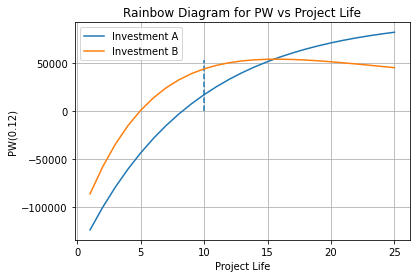


Break point 1 = 4.93
Break point 2 = 15.50
Change in value required for decision reversal = 5.50
%-change = 55.04%


In [6]:
""" Sensitivity Analysis on Project Life """
print("\nSensitivity Analysis on Project Life")

def PW_A_life(n):
    return PW_A(n, I_A, R_A, E_A, SV_A)
def PW_B_life(n):
    return PW_B(n, I_B, R_B, SV_B)

# Plot rainbow diagram 
n = np.linspace(1, 25, 25)
f1, ax1 = plt.subplots()
ax1.plot(n, PW_A_life(n), label="Investment A")
ax1.plot(n, PW_B_life(n), label="Investment B")
ax1.vlines(Life, 0, 1.2*max(PW_A_life(Life),PW_B_life(Life)), ls='--')
ax1.legend()
ax1.set_title("Rainbow Diagram for PW vs Project Life")
ax1.set_xlabel("Project Life")
ax1.set_ylabel(f"PW({marr})")
ax1.grid()
plt.show()

# Find break points
guess = 5
# Solve PW_B(n) = 0
bp1 = root(PW_B_life, guess, tol=1e-10).x
print(f"\nBreak point 1 = {bp1[0]:.2f}")
# Solve PW_B(n) = PW_A(n)
bp2 = root(lambda n: PW_A_life(n) - PW_B_life(n), guess, tol=1e-10).x
print(f"Break point 2 = {bp2[0]:.2f}")
print(f"Change in value required for decision reversal = {bp2[0]-Life:,.2f}")
print(f"%-change = {100*(bp2[0]-Life)/Life:.2f}%" )


Sensitivity Analysis on Initial Cost of Investment A


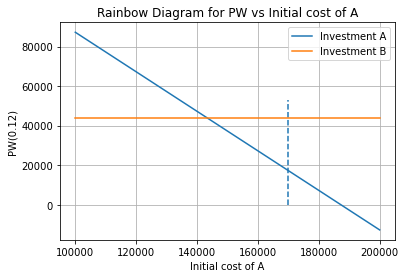


Reveral point = 143,173.35
Change in value required for decision reversal = -26,826.65
%-change = -15.78%


In [7]:
""" Sensitivity analysis on Initial cost of Investment A """
print("\nSensitivity Analysis on Initial Cost of Investment A")
def PW_A_I(I):
    return PW_A(Life, I, R_A, E_A, SV_A)    

# Plot rainbow diagram 
x = np.linspace(100000, 200000, 101)
f2, ax2 = plt.subplots()
ax2.plot(x, PW_A_I(x), label='Investment A')
ax2.plot(x, [PW_B_base]*len(x), label='Investment B')
ax2.vlines(I_A, 0, 1.2*max(PW_A_I(I_A), PW_B_base),ls='--')
ax2.legend()
ax2.set_title("Rainbow Diagram for PW vs Initial cost of A")
ax2.set_xlabel("Initial cost of A")
ax2.set_ylabel(f"PW({marr})")
ax2.grid()
plt.show()

# Find break point
guess = 140000
# solve PW_A(x)=PW_B_base
bp = root(lambda x: PW_A_I(x)-PW_B_base, guess, tol=1e-10).x
print(f"\nReveral point = {bp[0]:,.2f}")
print(f"Change in value required for decision reversal = {bp[0]-I_A:,.2f}")
print(f"%-change = {100*(bp[0]-I_A)/I_A:.2f}%")


Sensitivity Analysis on Annual Income of Investment A


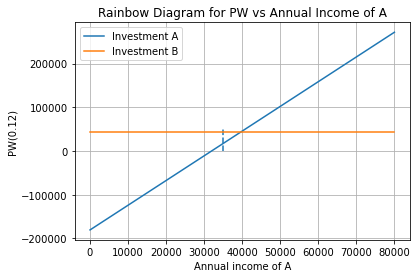


Reveral point = 39,747.89
Change in value required for decision reversal = 4,747.89
%-change = 13.57%


In [8]:
"""" Sensitivity analysis on Annual Income of Investment A """
print("\nSensitivity Analysis on Annual Income of Investment A")
def PW_A_R(R):
    return PW_A(Life, I_A, R, E_A, SV_A)      

# Plot rainbow diagram
x = np.linspace(0, 80000, 101)
f3, ax3 = plt.subplots()
ax3.plot(x, PW_A_R(x), label='Investment A')
ax3.plot(x, [PW_B_base]*len(x), label='Investment B')
ax3.vlines(R_A, 0, 1.2*max(PW_A_R(R_A), PW_B_base),ls='--')
ax3.legend()
ax3.set_title("Rainbow Diagram for PW vs Annual Income of A")
ax3.set_xlabel("Annual income of A")
ax3.set_ylabel(f"PW({marr})")
ax3.grid()
plt.show()

# Find break point
guess = 40000
# Solve PW_A(x) = PW_B_base
bp = root(lambda x: PW_A_R(x)-PW_B_base, guess, tol=1e-10).x
print(f"\nReveral point = {bp[0]:,.2f}")
print(f"Change in value required for decision reversal = {bp[0]-R_A:,.2f}")
print(f"%-change = {100*(bp[0]-R_A)/R_A:.2f}%")


Sensitivity Analysis on Annual Cost of Investment A


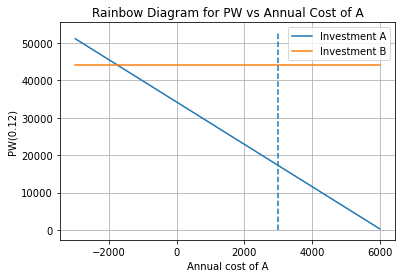


Reveral point = -1,747.89
Change in value required for decision reversal = -4,747.89
%-change = -158.26%


In [9]:
""" Sensitivity analysis on Annual Cost of Investment A """
print("\nSensitivity Analysis on Annual Cost of Investment A")
def PW_A_E(x):
    return PW_A(Life, I_A, R_A, x, SV_A)  

# Plot rainbow diagram
x = np.linspace(-3000, 6000, 101)
f4, ax4 = plt.subplots()
ax4.plot(x, PW_A_E(x), label='Investment A')
ax4.plot(x, [PW_B_base]*len(x), label='Investment B')
ax4.vlines(E_A, 0, 1.2*max(PW_A_E(E_A), PW_B_base), ls='--')
ax4.legend()
ax4.set_title("Rainbow Diagram for PW vs Annual Cost of A")
ax4.set_xlabel("Annual cost of A")
ax4.set_ylabel(f"PW({marr})")
ax4.grid()
plt.show()

# Find break point
guess = 2000
bp = root(lambda x: PW_A_E(x)-PW_B_base, guess, tol=1e-10).x
print(f"\nReveral point = {bp[0]:,.2f}")
print(f"Change in value required for decision reversal = {bp[0]-E_A:,.2f}")
print(f"%-change = {100*(bp[0]-E_A)/E_A:.2f}%")

In [10]:
""" Sensitivity analysis on Salvage Value of Investment A """
print("\nSensitivity Analysis on Salvage Value of Investment A")
def PW_A_SV(x):
    return PW_A(Life, I_A, R_A, E_A, x)  

# Plot rainbow diagram
x = np.linspace(0, 160000, 101)
f5, ax5 = plt.subplots()
ax5.plot(x, PW_A_SV(x), label='Investment A')
ax5.plot(x, [PW_B_base]*len(x), label='Investment B')
ax5.vlines(SV_A, 0, 1.2*max(PW_A_SV(SV_A), PW_B_base), ls='--')
ax5.legend()
ax5.set_title("Rainbow Diagram for PW vs Salvage Value of A")
ax5.set_xlabel("Salvage Value of A")
ax5.set_ylabel(f"PW({marr})")
ax5.grid()
plt.show()

# Find break point
guess = 100000
bp = root(lambda x: PW_A_SV(x)-PW_B_base, guess, tol=1e-10).x
print(f"\nReveral point = {bp[0]:,.2f}")
print(f"Change in value required for decision reversal = {bp[0]-SV_A:,.2f}")
print(f"%-change = {100*(bp[0]-SV_A)/SV_A:.2f}%")


Sensitivity Analysis on Salvage Value of Investment A



Reveral point = 103,319.51
Change in value required for decision reversal = 83,319.51
%-change = 416.60%
